<a href="https://colab.research.google.com/github/Mahmoudsabry3/scripts/blob/main/Investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Reading data

In [ ]:
import pandas as pd
# from dateutil.parser import _resultbase
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from collections import Counter
import numpy as np
from neupy import algorithms, utils
import pickle

In [ ]:
import pandas as pd  #importing pandas , pandas will help us to read and manipulate data
data = pd.read_excel('Data2.xlsx', index_col=0) #reading data
# indel_col= 0 , here we are using column 0 to index our rows
data.head(3) #head(3) will return the 1st 3 rows

,Investigation_Id,Week_No,Investigation_Created_Day,Investigation_Created_Date_Time,Recording_Year,Age,Gender,Nationality,Occupation,Disrtict_ID,...,Elevation,Area_CL,Area_HC,Area_TC,Area_SV,Urban_Area,Bare_Area,Area_CBA,Area_UBA,Water_Area
Case_ID,,,,,,,,,,,,,,,,,,,,,
2,JED012-2,1,Saturday,2011-12-31,2012,11.0,Male,Saudi,Student,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JED012-3,1,Saturday,2011-12-31,2012,35.0,Male,Saudi,NaN,159.0,...,15.321481,0.0,1170000.0,0.0,0.0,4050000.0,180000.0,0.0,1440000.0,0.0
4,JED012-4,1,Saturday,2011-12-31,2012,24.0,Female,Saudi,Teacher,206.0,...,0.000000,0.0,0.0,0.0,0.0,8460000.0,0.0,0.0,0.0,0.0


#### Data preprocessing

In [ ]:
data.columns # data.columns will all the columns in our data

Index(['Investigation_Id', 'Week_No', 'Investigation_Created_Day',
       'Investigation_Created_Date_Time', 'Recording_Year', 'Age', 'Gender',
       'Nationality', 'Occupation', 'Disrtict_ID', 'Disrtict',
       'Original_Disrtict', 'Initial_District_Name', 'Initial_Disrtict_Code',
       'Disrtict_Code', 'Initial_Address', 'Address', 'Municipality',
       'Municipality_ID', 'City', 'The_Date_the_Symptoms_Appeared',
       'Hospital_Name', 'Was_the_Patient_Hypnotized_YES',
       'Was_the_Patient_Hypnotized_NO', 'The_Final_Diagnosis',
       'International_Epidemiological_Weeks', 'Sampling_Date', 'Population',
       'Temperature', 'Precipitation', 'Wind_Speed', 'Humidity', 'Elevation',
       'Area_CL', 'Area_HC', 'Area_TC', 'Area_SV', 'Urban_Area', 'Bare_Area',
       'Area_CBA', 'Area_UBA', 'Water_Area'],
      dtype='object')

In [ ]:
data.info() # data.info will return information data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790 entries, 2 to 1928
Data columns (total 42 columns):
Investigation_Id                       1790 non-null object
Week_No                                1790 non-null int64
Investigation_Created_Day              1790 non-null object
Investigation_Created_Date_Time        1790 non-null datetime64[ns]
Recording_Year                         1790 non-null int64
Age                                    1773 non-null float64
Gender                                 1789 non-null object
Nationality                            1780 non-null object
Occupation                             1168 non-null object
Disrtict_ID                            1292 non-null float64
Disrtict                               1323 non-null object
Original_Disrtict                      1789 non-null object
Initial_District_Name                  0 non-null float64
Initial_Disrtict_Code                  0 non-null float64
Disrtict_Code                          1733 non-n

#### Binary Encoding

In [ ]:
#!pip install category-encoders
import category_encoders as ce
# Enter the columns name
cols = ['Week_No', 'Recording_Year','Age','Gender', 'Nationality', 'Occupation','Municipality_ID','Hospital_Name','The_Final_Diagnosis','Population', 'Temperature','Precipitation', 'Wind_Speed', 'Humidity', 'Elevation', 'Area_CL', 'Area_HC', 'Area_TC', 'Area_SV', 'Urban_Area', 'Bare_Area', 'Area_CBA', 'Area_UBA', 'Water_Area']

In [ ]:
for col in cols:
  encoder = ce.BinaryEncoder(cols = col)
  dfbin = encoder.fit_transform(data[col])
  data = pd.concat([data, dfbin], axis = 1)

print(data.columns)
data.head()

Index(['Investigation_Id', 'Week_No', 'Investigation_Created_Day',
       'Investigation_Created_Date_Time', 'Recording_Year', 'Age', 'Gender',
       'Nationality', 'Occupation', 'Disrtict_ID',
       ...
       'Area_UBA_0', 'Area_UBA_1', 'Area_UBA_2', 'Area_UBA_3', 'Area_UBA_4',
       'Water_Area_0', 'Water_Area_1', 'Water_Area_2', 'Water_Area_3',
       'Water_Area_4'],
      dtype='object', length=181)


,Investigation_Id,Week_No,Investigation_Created_Day,Investigation_Created_Date_Time,Recording_Year,Age,Gender,Nationality,Occupation,Disrtict_ID,...,Area_UBA_0,Area_UBA_1,Area_UBA_2,Area_UBA_3,Area_UBA_4,Water_Area_0,Water_Area_1,Water_Area_2,Water_Area_3,Water_Area_4
Case_ID,,,,,,,,,,,,,,,,,,,,,
2,JED012-2,1,Saturday,2011-12-31,2012,11.0,Male,Saudi,Student,NaN,...,0,0,0,0,1,0,0,0,0,1
3,JED012-3,1,Saturday,2011-12-31,2012,35.0,Male,Saudi,NaN,159.0,...,0,0,0,1,0,0,0,0,1,0
4,JED012-4,1,Saturday,2011-12-31,2012,24.0,Female,Saudi,Teacher,206.0,...,0,0,0,1,1,0,0,0,1,0
5,JED012-5,1,Saturday,2011-12-31,2012,30.0,Male,Pakistani,Labourer,202.0,...,0,0,0,1,1,0,0,0,1,0
7,JED012-7,1,Saturday,2011-12-31,2012,50.0,Male,Indian,Labourer,123.0,...,0,0,0,1,1,0,0,0,1,0


#### Varibale selection

#### Removing few columns which won't have much use

In [ ]:
print(data.columns)

Index(['Investigation_Id', 'Week_No', 'Investigation_Created_Day',
       'Investigation_Created_Date_Time', 'Recording_Year', 'Age', 'Gender',
       'Nationality', 'Occupation', 'Disrtict_ID',
       ...
       'Area_UBA_0', 'Area_UBA_1', 'Area_UBA_2', 'Area_UBA_3', 'Area_UBA_4',
       'Water_Area_0', 'Water_Area_1', 'Water_Area_2', 'Water_Area_3',
       'Water_Area_4'],
      dtype='object', length=181)


In [ ]:
data.shape

(1790, 181)

In [ ]:
data_with_missing_values = data[['Week_No', 'Recording_Year','Age','Gender', 'Nationality', 'Occupation','Municipality_ID','Hospital_Name','The_Final_Diagnosis','Population', 'Temperature','Precipitation', 'Wind_Speed', 'Humidity', 'Elevation', 'Area_CL', 'Area_HC', 'Area_TC', 'Area_SV', 'Urban_Area', 'Bare_Area', 'Area_CBA', 'Area_UBA', 'Water_Area']]
#here we are selecting few columns 

In [ ]:
data_with_missing_values # displaying selected rows

,Week_No,Recording_Year,Age,Gender,Nationality,Occupation,Municipality_ID,Hospital_Name,The_Final_Diagnosis,Population,...,Elevation,Area_CL,Area_HC,Area_TC,Area_SV,Urban_Area,Bare_Area,Area_CBA,Area_UBA,Water_Area
Case_ID,,,,,,,,,,,,,,,,,,,,,
2,1,2012,11.0,Male,Saudi,Student,NaN,International Medical Center,Suspect,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2012,35.0,Male,Saudi,NaN,1.0,International Medical Center,Suspect,16867.0,...,15.321481,0.0,1170000.0,0.0,0.0,4050000.0,180000.0,0.0,1440000.0,0.0
4,1,2012,24.0,Female,Saudi,Teacher,11.0,International Medical Center,Suspect,0.0,...,0.000000,0.0,0.0,0.0,0.0,8460000.0,0.0,0.0,0.0,0.0
5,1,2012,30.0,Male,Pakistani,Labourer,1.0,Jeddah National Hospital,Confirmed,0.0,...,3.353018,180000.0,90000.0,0.0,0.0,4860000.0,0.0,0.0,0.0,0.0
7,1,2012,50.0,Male,Indian,Labourer,5.0,Jeddah National Hospital,Confirmed,2692.0,...,18.407518,0.0,0.0,0.0,0.0,1800000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923,52,2012,59.0,Male,Yamani,NaN,NaN,Dr. Soliman Fakeeh Hospital,Confirmed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,52,2012,11.0,Female,Saudi,Student,3.0,New Al Jedaani Hospital,Confirmed,25650.0,...,19.649851,0.0,0.0,0.0,0.0,4770000.0,2160000.0,0.0,0.0,360000.0
1925,52,2012,25.0,Male,Pakistani,Labourer,1.0,Dr. Khalid Idriss Hospital,Confirmed,16282.0,...,12.079623,0.0,0.0,0.0,0.0,4140000.0,0.0,0.0,270000.0,180000.0


In [ ]:
data_with_missing_values.isna().any() # check for columns with nan values in our data 

Week_No                False
Recording_Year         False
Age                     True
Gender                  True
Nationality             True
Occupation              True
Municipality_ID         True
Hospital_Name          False
The_Final_Diagnosis     True
Population              True
Temperature             True
Precipitation           True
Wind_Speed              True
Humidity                True
Elevation               True
Area_CL                 True
Area_HC                 True
Area_TC                 True
Area_SV                 True
Urban_Area              True
Bare_Area               True
Area_CBA                True
Area_UBA                True
Water_Area              True
dtype: bool

In [ ]:
selected_data=data_with_missing_values.fillna(0) # initially filling the missing values with 0's.

In [ ]:
selected_data.isna().any() #checking for nan values afterr filling with zero's

Week_No                False
Recording_Year         False
Age                    False
Gender                 False
Nationality            False
Occupation             False
Municipality_ID        False
Hospital_Name          False
The_Final_Diagnosis    False
Population             False
Temperature            False
Precipitation          False
Wind_Speed             False
Humidity               False
Elevation              False
Area_CL                False
Area_HC                False
Area_TC                False
Area_SV                False
Urban_Area             False
Bare_Area              False
Area_CBA               False
Area_UBA               False
Water_Area             False
dtype: bool

In [ ]:
# converting the categorical labels to numerical values
from sklearn.feature_extraction.text import CountVectorizer
def encode_categorical_to_numerical(category):
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(category.astype('str')).toarray()
    feature_names = vectorizer.get_feature_names()
    return feature_names,X # fitting and transform the categories for numerical values

In [ ]:
feature_names_gender,vectorized_Gender = encode_categorical_to_numerical(selected_data.Gender)

In [ ]:
feature_names_gender

['female', 'male']

In [ ]:
vectorized_Gender[:5]

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1]], dtype=int64)

In [ ]:
feature_names_Nationality,vectorized_Nationality = encode_categorical_to_numerical(selected_data.Nationality)
print(feature_names_Nationality)

['afghan', 'african', 'american', 'australian', 'baloch', 'bengali', 'british', 'bruneian', 'burmese', 'canadian', 'chadianian', 'chinese', 'djiboutian', 'egyptian', 'eritrean', 'ethiopian', 'filipino', 'french', 'guinean', 'indian', 'indonesian', 'iraqi', 'jordanian', 'kenyan', 'korean', 'lankan', 'lebanese', 'malaysian', 'moroccan', 'myanmar', 'nepalese', 'nigerian', 'pakistani', 'palestinian', 'qatari', 'saudi', 'somali', 'south', 'sri', 'sudanese', 'syrian', 'tanzanian', 'tunisian', 'turkish', 'yamani']


In [ ]:
vectorized_Nationality[-5:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0]], dtype=int64)

In [ ]:
feature_names_occupation,vectorized_Occupation = encode_categorical_to_numerical(selected_data.Occupation)
print(feature_names_occupation)

['accountant', 'administrative', 'administrator', 'air', 'aircraft', 'airlines', 'anesthesia', 'aramco', 'architect', 'architectural', 'bank', 'blacksmith', 'builder', 'building', 'businessman', 'carpenter', 'cashier', 'chef', 'chemical', 'child', 'cleaning', 'clerk', 'coffee', 'company', 'computer', 'condition', 'consultant', 'contracting', 'customs', 'data', 'dentist', 'department', 'dietitian', 'director', 'distributor', 'doctor', 'driver', 'education', 'educational', 'electrician', 'electricity', 'employee', 'employeein', 'engineer', 'entry', 'equipment', 'farmer', 'force', 'forwarder', 'freelancer', 'furniture', 'general', 'government', 'grocer', 'guard', 'gypsum', 'handicap', 'headmaster', 'hotel', 'housemaid', 'housewife', 'in', 'inspector', 'interior', 'journalist', 'laboratory', 'labour', 'labourer', 'lecturer', 'maintenance', 'man', 'manager', 'marketer', 'mechanical', 'merchant', 'monitor', 'muezzin', 'national', 'navigator', 'no', 'nurse', 'observer', 'of', 'office', 'offic

In [ ]:
vectorized_Occupation[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Municipality_ID,vectorized_Municipality_ID = encode_categorical_to_numerical(selected_data.Municipality_ID)
print(feature_names_Municipality_ID)

['10', '11', '12', '13', '14', '15']


In [ ]:
vectorized_Municipality_ID[:2]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_The_Final_Diagnosis,vectorized_The_Final_Diagnosis = encode_categorical_to_numerical(selected_data.The_Final_Diagnosis)
print(feature_names_The_Final_Diagnosis)

['confirmed', 'suspect']


In [ ]:
vectorized_The_Final_Diagnosis[:5]

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0]], dtype=int64)

In [ ]:
feature_names_Week_No,vectorized_Week_No = encode_categorical_to_numerical(selected_data.Week_No)
print(feature_names_Week_No)

['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']


In [ ]:
vectorized_Week_No[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [ ]:
feature_names_Recording_Year,vectorized_Recording_Year = encode_categorical_to_numerical(selected_data.Recording_Year)
print(feature_names_Recording_Year)

['2012']


In [ ]:
vectorized_Recording_Year[:2]

array([[1],
       [1]], dtype=int64)

In [ ]:
feature_names_Age,vectorized_Age = encode_categorical_to_numerical(selected_data.Age)
print(feature_names_Age)

['08', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '81', '82', '83', '85', '92', '93']


In [ ]:
vectorized_Age[:2]

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Hospital_Name,vectorized_Hospital_Name = encode_categorical_to_numerical(selected_data.Hospital_Name)
print(feature_names_Hospital_Name)

['abdulaziz', 'abeer', 'abuzinadh', 'al', 'and', 'andalusia', 'armed', 'aziziyah', 'badruddin', 'bagedo', 'bakhsh', 'bawadi', 'bin', 'bugshan', 'center', 'children', 'city', 'clinic', 'clinics', 'college', 'diagnostic', 'doctors', 'dr', 'east', 'erfan', 'essa', 'fahad', 'fakeeh', 'for', 'forces', 'general', 'german', 'ghazzawi', 'gnp', 'hai', 'hala', 'hamrah', 'hassan', 'hayat', 'health', 'highway', 'hospital', 'ibn', 'idriss', 'international', 'islam', 'jamea', 'jedaani', 'jeddah', 'khalid', 'king', 'laden', 'lith', 'madain', 'mahjar', 'maternity', 'medical', 'mostaqbal', 'national', 'new', 'of', 'phc', 'polyclinic', 'quds', 'qwizain', 'rabigh', 'saba', 'saud', 'saudi', 'sciences', 'sharq', 'sina', 'soliman', 'thaghr', 'the', 'united', 'university', 'zahra', 'الطبي', 'الكمال', 'بجده', 'عيادات', 'مجمع']


In [ ]:
vectorized_Hospital_Name[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Population,vectorized_Population = encode_categorical_to_numerical(selected_data.Population)
print(feature_names_Population)

['108', '112174', '113306', '11344', '120', '12092', '12170', '1245', '13', '13702', '142542', '14857', '156449', '157598', '16242', '16282', '16653', '16867', '1751', '1756', '17607', '180786', '1847', '1895', '19', '2043', '207', '21', '218169', '21959', '237', '23966', '2499', '251', '25166', '25650', '2672', '26915', '2692', '27092', '2896', '31', '311', '3294', '33', '34609', '34966', '3631', '37836', '40', '4330', '44726', '46040', '46396', '47271', '483', '51174', '513', '52311', '53558', '53983', '570', '69', '69261', '7846', '81526', '8328', '857', '86905', '88', '9153', '9159', '92', '95383', '9820', '985']


In [ ]:
vectorized_Population[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Temperature,vectorized_Temperature = encode_categorical_to_numerical(selected_data.Temperature)
print(feature_names_Temperature)

['007019', '007965', '02417', '028595', '045288', '082611', '107493', '127399', '157257', '182288', '198975', '206702', '240692', '28241', '29', '309031', '362274', '37113', '378044', '382683', '383301', '389539', '390453', '406555', '473594']


In [ ]:
vectorized_Temperature[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Precipitation,vectorized_Precipitation = encode_categorical_to_numerical(selected_data.Precipitation)
print(feature_names_Precipitation)

['028113', '028908', '058145', '069832', '097722', '098014', '104667', '116586', '126868', '146215', '153921', '15669', '172844', '176134', '223894', '23', '230363', '230902', '24', '246665', '259192', '261517', '27', '28', '29', '30', '308702', '31', '314271', '32', '323867', '33', '34', '345681', '35', '353358', '36', '37', '38', '39', '39601', '402952', '404003', '41', '410358', '42', '43', '43113', '44', '449595', '45', '46', '461029', '47', '48', '486088', '51', '52', '53', '56', '563114', '577182', '592718', '592844', '602154', '60933', '63497', '654388', '655512', '658716', '659583', '665652', '672628', '682117', '725638', '734004', '758033', '767144', '807707', '811268', '827298', '832464', '853813', '865264', '922517', '937359', '955008', '977188', '977359', '998976']


In [ ]:
vectorized_Precipitation[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0]], dtype=int64)

In [ ]:
feature_names_Wind_Speed,vectorized_Wind_Speed = encode_categorical_to_numerical(selected_data.Wind_Speed)
print(feature_names_Wind_Speed)

['106709', '111398', '118796', '125468', '145038', '156828', '157473', '164468', '167281', '176127', '182763', '188188', '201626', '204918', '21113', '219314', '228631', '242288', '244458', '269603', '275191', '287773', '288242', '295674', '300355', '312936', '314335', '315579', '320744', '325518', '334063', '338113', '348512', '349387', '351441', '352292', '352635', '352886', '356071', '363441', '380381', '39818', '409621', '428183', '430207', '438305']


In [ ]:
vectorized_Wind_Speed[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]], dtype=int64)

In [ ]:
feature_names_Humidity,vectorized_Humidity = encode_categorical_to_numerical(selected_data.Humidity)
print(feature_names_Humidity)

['010478', '010804', '011024', '011739', '012131', '012459', '012846', '012851', '012974', '013103', '013127', '013318', '013748', '014185', '014393', '014407', '014527', '014797', '015038', '015152', '01527', '016075']


In [ ]:
vectorized_Humidity[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [ ]:
feature_names_Elevation,vectorized_Elevation = encode_categorical_to_numerical(selected_data.Elevation)
print(feature_names_Elevation)

['01321', '032665', '047853', '057838', '07229', '078402', '079623', '10', '108661', '109', '11', '117', '12', '120', '1225', '129', '13', '133', '134326', '138924', '15', '157', '16', '17', '18', '19', '20', '22', '228765', '23', '234754', '240493', '25', '26', '264', '265804', '266396', '270325', '276217', '28', '281348', '287365', '29', '30', '305659', '31', '321481', '326467', '342132', '35', '353018', '36', '360551', '37', '378917', '38', '380014', '385122', '39', '390258', '396945', '396976', '398561', '407518', '41', '42', '427933', '43', '441355', '457732', '466897', '492991', '501042', '50757', '5268', '533784', '542467', '54275', '56', '575796', '578947', '58', '596133', '61', '62', '642973', '646998', '649851', '65', '653358', '66', '660208', '675536', '676239', '683379', '69', '717412', '725459', '733091', '733935', '741687', '77', '791766', '81', '814076', '820778', '823179', '82755', '83', '846245', '85', '855578', '88', '883763', '894545', '899292', '909485', '932609', '

In [ ]:
vectorized_Elevation[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Area_CL,vectorized_Area_CL = encode_categorical_to_numerical(selected_data.Area_CL)
print(feature_names_Area_CL)

['1080000', '1260000', '1440000', '180000', '270000', '360000', '450000', '630000', '810000', '90000', '990000']


In [ ]:
vectorized_Area_CL[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Area_HC,vectorized_Area_HC = encode_categorical_to_numerical(selected_data.Area_HC)
print(feature_names_Area_HC)

['1170000', '1260000', '1530000', '180000', '2160000', '450000', '5490000', '720000', '90000']


In [ ]:
vectorized_Area_HC[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Area_TC,vectorized_Area_TC = encode_categorical_to_numerical(selected_data.Area_TC)
print(feature_names_Area_TC)

['1170000']


In [ ]:
vectorized_Area_TC[:2]

array([[0],
       [0]], dtype=int64)

In [ ]:
feature_names_Area_SV,vectorized_Area_SV = encode_categorical_to_numerical(selected_data.Area_SV)
print(feature_names_Area_SV)

['1260000', '1350000', '1620000', '180000', '2430000', '270000', '3690000', '450000', '540000', '810000', '90000', '900000']


In [ ]:
vectorized_Area_SV[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Urban_Area,vectorized_Urban_Area = encode_categorical_to_numerical(selected_data.Urban_Area)
print(feature_names_Urban_Area)

['1080000', '1170000', '1260000', '14040000', '1440000', '1530000', '15930000', '1710000', '1800000', '1980000', '2070000', '2160000', '2340000', '2520000', '270000', '2700000', '2790000', '3510000', '3600000', '3690000', '3870000', '4050000', '4140000', '4230000', '4320000', '4410000', '450000', '4590000', '4680000', '4770000', '4860000', '4950000', '5040000', '5220000', '5310000', '540000', '5760000', '5850000', '6210000', '6840000', '6930000', '7200000', '7380000', '7470000', '7560000', '7650000', '7830000', '810000', '8100000', '8190000', '8460000', '90000', '9540000', '9630000', '9720000', '990000']


In [ ]:
vectorized_Urban_Area[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Bare_Area,vectorized_Bare_Area = encode_categorical_to_numerical(selected_data.Bare_Area)
print(feature_names_Bare_Area)

['10350000', '1080000', '11250000', '11430000', '11520000', '1170000', '12150000', '12420000', '12510000', '1260000', '1350000', '13680000', '15210000', '15390000', '16200000', '16290000', '17010000', '180000', '20340000', '2160000', '22050000', '22140000', '2430000', '270000', '3150000', '31590000', '32400000', '33570000', '3600000', '3690000', '4140000', '45360000', '5310000', '540000', '6030000', '720000', '7920000', '90000', '900000', '9360000', '9630000', '9720000', '9990000']


In [ ]:
vectorized_Bare_Area[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [ ]:
feature_names_Area_CBA,vectorized_Area_CBA= encode_categorical_to_numerical(selected_data.Area_CBA)
print(feature_names_Area_CBA)

['1440000', '180000', '2520000', '270000', '450000', '90000', '990000']


In [ ]:
vectorized_Area_CBA[:2]

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Area_UBA,vectorized_Area_UBA = encode_categorical_to_numerical(selected_data.Area_UBA)
print(feature_names_Area_UBA)

['1080000', '1440000', '180000', '1980000', '2430000', '270000', '2790000', '3420000', '360000', '450000', '540000', '630000', '90000']


In [ ]:
vectorized_Area_UBA[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
feature_names_Water_Area,vectorized_Water_Area = encode_categorical_to_numerical(selected_data.Water_Area)
print(feature_names_Water_Area)

['180000', '1980000', '270000', '360000', '450000', '90000', '900000', '990000']


In [ ]:
vectorized_Water_Area[:2]

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [ ]:
selected_data.head(3) # printing first 3 rows and checking the values

,Week_No,Recording_Year,Age,Gender,Nationality,Occupation,Municipality_ID,Hospital_Name,The_Final_Diagnosis,Population,...,Elevation,Area_CL,Area_HC,Area_TC,Area_SV,Urban_Area,Bare_Area,Area_CBA,Area_UBA,Water_Area
Case_ID,,,,,,,,,,,,,,,,,,,,,
2,1,2012,11.0,Male,Saudi,Student,0.0,International Medical Center,Suspect,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2012,35.0,Male,Saudi,0,1.0,International Medical Center,Suspect,16867.0,...,15.321481,0.0,1170000.0,0.0,0.0,4050000.0,180000.0,0.0,1440000.0,0.0
4,1,2012,24.0,Female,Saudi,Teacher,11.0,International Medical Center,Suspect,0.0,...,0.000000,0.0,0.0,0.0,0.0,8460000.0,0.0,0.0,0.0,0.0


#### Hstacking

In [ ]:
len(vectorized_Week_No),len(vectorized_Recording_Year),len(vectorized_Age),len(vectorized_Gender),len(vectorized_Nationality),len(vectorized_Occupation),len(vectorized_Municipality_ID),len(vectorized_Hospital_Name),len(vectorized_The_Final_Diagnosis),len(vectorized_Population),len(vectorized_Temperature),len(vectorized_Precipitation),len(vectorized_Wind_Speed),len(vectorized_Humidity),len(vectorized_Elevation),len(vectorized_Area_CL),len(vectorized_Area_HC),len(vectorized_Area_TC),len(vectorized_Area_SV),len(vectorized_Urban_Area),len(vectorized_Bare_Area),len(vectorized_Area_CBA),len(vectorized_Area_UBA),len(vectorized_Water_Area),

(1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790,
 1790)

In [ ]:
selected_data.Week_No=selected_data.Week_No.values.reshape(-1,1)

In [ ]:
import numpy as np

hstacked_data = np.column_stack((vectorized_Week_No, vectorized_Recording_Year,
                                 vectorized_Age, vectorized_Gender, vectorized_Nationality, vectorized_Occupation, vectorized_Municipality_ID,
                                 vectorized_Hospital_Name, vectorized_The_Final_Diagnosis, vectorized_Population, vectorized_Temperature,
                                 vectorized_Precipitation, vectorized_Wind_Speed, vectorized_Humidity, vectorized_Elevation, vectorized_Area_CL,
                                 vectorized_Area_HC, vectorized_Area_TC, vectorized_Area_SV, vectorized_Urban_Area, vectorized_Bare_Area,
                                 vectorized_Area_CBA, vectorized_Area_UBA, vectorized_Water_Area))

In [ ]:
hstacked_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Normalizing data 

In [ ]:
from sklearn.preprocessing import Normalizer
normalized_data = Normalizer().fit_transform(hstacked_data) # normalizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
standarized_data = StandardScaler().fit_transform(hstacked_data) #standarizing the data 
standarized_data = np.array(standarized_data)

In [ ]:
#this code will ignore the warninghs
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# importing self organizing maps and defining the parameters to SOM
#!pip install neupy
import numpy as np
from neupy import algorithms, utils
som = algorithms.SOFM(n_inputs=945,n_outputs=946,
    step=0.32,
    show_epoch=50,
    verbose=True,
    learning_radius=750,
    features_grid=(946, 1))


Main information

[ALGORITHM] SOFM

[OPTION] distance = ['euclid', 'neg_euclid_distance']
[OPTION] features_grid = [946, 1]
[OPTION] grid_type = ['rectangle', 'find_neighbours_on_rect_grid', 'find_step_scaler_on_rect_grid']
[OPTION] learning_radius = 750
[OPTION] n_inputs = 945
[OPTION] n_outputs = 946
[OPTION] reduce_radius_after = 100
[OPTION] reduce_std_after = 100
[OPTION] reduce_step_after = 100
[OPTION] show_epoch = 50
[OPTION] shuffle_data = False
[OPTION] signals = None
[OPTION] std = 1
[OPTION] step = 0.32
[OPTION] verbose = True
[OPTION] weight = Normal(mean=0, std=0.01)



In [ ]:
som.train(normalized_data, epochs=20) # training the SOM's

#1 : [01:02] train: 0.006177


#20 : [01:12] train: 0.006193


In [ ]:
som_data = som.predict(standarized_data) # predicting the som for the data

In [ ]:
sum(som_data)

array([262,   5,   1,   8,  38, 103,   6,   3,  22,   8,   3, 151,   2,
         0,   3,   0,   3,  65,   0,   0,   0,   1,   0,   0,   0,   0,
         0,   0,   0, 127,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# Applying clustering on SOM data
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=100).fit(som_data) # fitting the data
labels = clustering.labels_ # getting labels from the clustered data

In [ ]:
# applying PCA on data to reduce the dimensions , so that  we can visualize it on 2d plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #initiating PCA
dim_red=pca.fit_transform(normalized_data) #reducing the dimensions

#### Cluster plot

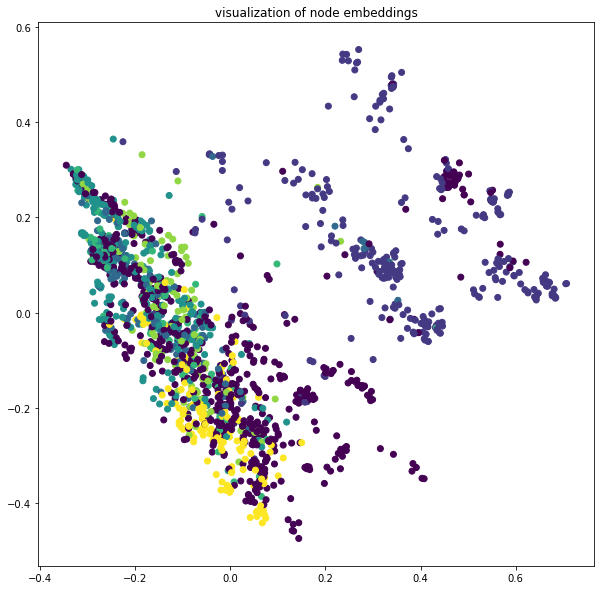

In [ ]:
import matplotlib.pyplot as plt
# draw the points

label_map = { l: i for i, l in enumerate(np.unique(labels))}
node_colours = [ label_map[target] for target in labels]

plt.figure(figsize=(10,10))
plt.axes().set(aspect="equal")
plt.scatter(dim_red[:,0], 
            dim_red[:,1], 
            c=node_colours, alpha=1)
plt.title('visualization of node embeddings')

plt.show()

#### Filling the missing values with most frequent values from a cluster

In [ ]:
data_with_missing_values['label']=labels # creating a new column for labels

In [ ]:
data_with_missing_values.head(3) # printing the first few rows 

,Week_No,Recording_Year,Age,Gender,Nationality,Occupation,Municipality_ID,Hospital_Name,The_Final_Diagnosis,Population,...,Area_CL,Area_HC,Area_TC,Area_SV,Urban_Area,Bare_Area,Area_CBA,Area_UBA,Water_Area,label
Case_ID,,,,,,,,,,,,,,,,,,,,,
2,1,2012,11.0,Male,Saudi,Student,NaN,International Medical Center,Suspect,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,2012,35.0,Male,Saudi,NaN,1.0,International Medical Center,Suspect,16867.0,...,0.0,1170000.0,0.0,0.0,4050000.0,180000.0,0.0,1440000.0,0.0,0
4,1,2012,24.0,Female,Saudi,Teacher,11.0,International Medical Center,Suspect,0.0,...,0.0,0.0,0.0,0.0,8460000.0,0.0,0.0,0.0,0.0,0


In [ ]:
data_with_missing_values.isna().any()# checking for nan columns

Week_No                False
Recording_Year         False
Age                     True
Gender                  True
Nationality             True
Occupation              True
Municipality_ID         True
Hospital_Name          False
The_Final_Diagnosis     True
Population              True
Temperature             True
Precipitation           True
Wind_Speed              True
Humidity                True
Elevation               True
Area_CL                 True
Area_HC                 True
Area_TC                 True
Area_SV                 True
Urban_Area              True
Bare_Area               True
Area_CBA                True
Area_UBA                True
Water_Area              True
label                  False
dtype: bool

In [ ]:
missing_data = data_with_missing_values.groupby('label') # grouping data based on labels (clustering labels)

In [ ]:
missing_data.agg(pd.Series.mode) # aggregating based on most frequent values (mode)

,Week_No,Recording_Year,Age,Gender,Nationality,Occupation,Municipality_ID,Hospital_Name,The_Final_Diagnosis,Population,...,Elevation,Area_CL,Area_HC,Area_TC,Area_SV,Urban_Area,Bare_Area,Area_CBA,Area_UBA,Water_Area
label,,,,,,,,,,,,,,,,,,,,,
-1,24,2012,30,Male,Saudi,Student,3.0,King Abdulaziz Hospital,Confirmed,0,...,28.5425,0.0,0.0,0.0,0.0,2.16e+06,0.0,0.0,0.0,0.0
0,52,2012,"[28.0, 30.0]",Male,Saudi,Student,2.0,International Medical Center,Suspect,0,...,0,0.0,0.0,0.0,0.0,8.46e+06,0.0,0.0,0.0,0.0
1,12,2012,31,Male,Saudi,Student,6.0,Jeddah National Hospital,Confirmed,26915,...,65.8208,0.0,0.0,0.0,0.0,1.404e+07,0.0,0.0,90000.0,0.0
2,52,2012,35,Male,Egyptian,Labourer,2.0,Al Zahra'a Hospital,Confirmed,"[1895.0, 142542.0]",...,"[17.385122, 83.234754]",0.0,0.0,0.0,0.0,"[4590000.0, 4770000.0]",0.0,0.0,0.0,0.0


In [ ]:
try:
    for data in range(len(data_with_missing_values.Week_No.values)): # for every data in category
        if(np.isnan(data_with_missing_values['Week_No'][data])): # checking for nan values 
            z = missing_data.Week_No.agg(pd.Series.mode)[data_with_missing_values['label'][data]] # finding the value which we want to replace
            try:
                data_with_missing_values['Week_No'][data] = z[0] # if two or more value , then we are assignng 1st value
            except:
                try:
                    data_with_missing_values['Week_No'][data] = z # else we will assign the single returned value
                except:
                    data_with_missing_values['Week_No'][data]=0
except:
    data_with_missing_values.Week_No.fillna(data_with_missing_values.Week_No.mean(),inplace=True)

In [ ]:
data_with_missing_values.Week_No.isna().any()

False

In [ ]:
try:
    for data in range(len(data_with_missing_values.Disrtict_Code.values)): # for every data in category
        if(np.isnan(data_with_missing_values['Municipality_ID'][data])): # checking for nan values 
            z = missing_data.Disrtict_Code.agg(pd.Series.mode)[data_with_missing_values['label'][data]]# finding the value which we want to replace
            try:
                data_with_missing_values['Municipality_ID'][data] = z[0] # if two or more value , then we are assignng 1st value
            except:
                try:
                    data_with_missing_values['Municipality_ID'][data] = z  # else we will assign the single returned value
                except:
                    data_with_missing_values['Municipality_ID'][data]=0
except:
    data_with_missing_values.Municipality_ID.fillna(data_with_missing_values.Municipality_ID.mean(),inplace=True)

In [ ]:
data_with_missing_values.Municipality_ID.isna().any()

False

In [ ]:
data_with_missing_values.isna().any()

Week_No                False
Recording_Year         False
Age                     True
Gender                  True
Nationality             True
Occupation              True
Municipality_ID        False
Hospital_Name          False
The_Final_Diagnosis     True
Population              True
Temperature             True
Precipitation           True
Wind_Speed              True
Humidity                True
Elevation               True
Area_CL                 True
Area_HC                 True
Area_TC                 True
Area_SV                 True
Urban_Area              True
Bare_Area               True
Area_CBA                True
Area_UBA                True
Water_Area              True
label                  False
dtype: bool

In [ ]:
try:
    for data in range(len(data_with_missing_values.Nationalty.values)):# for every data in category
        if(pd.isnull(data_with_missing_values['Nationality'][data])): # checking for nan values 
            z = missing_data.Nationalty.agg(pd.Series.mode)[data_with_missing_values['label'][data]]# finding the value which we want to replace
            try:
                data_with_missing_values['Nationality'][data] = z[0]# if two or more value , then we are assignng 1st value
            except:
                try:
                    data_with_missing_values['Nationality'][data] = z  # else we will assign the single returned value
                except:
                    data_with_missing_values['Nationality'][data]=0
except:
    data_with_missing_values.Nationality.fillna('Saudi',inplace=True)

In [ ]:
data_with_missing_values.Nationality.isna().any()

False

In [ ]:
try:
    for data in range(len(data_with_missing_values.Occupation.values)):# for every data in category
        if(pd.isnull(data_with_missing_values['Occupation'][data])): # checking for nan values 
            z = missing_data.Occupation.agg(pd.Series.mode)[data_with_missing_values['label'][data]]# finding the value which we want to replace
            try:
                data_with_missing_values['Occupation'][data] = z[0]# if two or more value , then we are assignng 1st value
            except:
                try:
                    data_with_missing_values['Occupation'][data] = z  # else we will assign the single returned value
                except:
                    data_with_missing_values['Occupation'][data]=0
except:
    data_with_missing_values.Occupation.fillna('Student',inplace=True) # filling with student as most of clusters have student as mode 

In [ ]:
data_with_missing_values.Occupation.isna().any()

False

In [ ]:
try:
    for data in range(len(data_with_missing_values.City.values)):# for every data in category
        if(pd.isnull(data_with_missing_values['Hospital_Name'][data])): # checking for nan values 
            z = missing_data.City.agg(pd.Series.mode)[data_with_missing_values['label'][data]]# finding the value which we want to replace
            try:
                data_with_missing_values['Hospital_Name'][data] = z[0] # if two or more value , then we are assignng 1st value
            except:
                try:
                    data_with_missing_values['Hospital_Name'][data] = z  # else we will assign the single returned value
                except:
                    data_with_missing_values['Hospital_Name'][data]=0
except:
    data_with_missing_values.Hospital_Name.fillna('Jeddah National Hospital',inplace=True)

In [ ]:
data_with_missing_values.Hospital_Name.isna().any()

False

In [ ]:
data_with_missing_values.Age.fillna(data_with_missing_values.Age.mean(),inplace=True) # here we are filling with mean, because age is continous term , not a categorical value

In [ ]:
data_with_missing_values.isna().any() # checking for missing values

Week_No                False
Recording_Year         False
Age                    False
Gender                  True
Nationality            False
Occupation             False
Municipality_ID        False
Hospital_Name          False
The_Final_Diagnosis     True
Population              True
Temperature             True
Precipitation           True
Wind_Speed              True
Humidity                True
Elevation               True
Area_CL                 True
Area_HC                 True
Area_TC                 True
Area_SV                 True
Urban_Area              True
Bare_Area               True
Area_CBA                True
Area_UBA                True
Water_Area              True
label                  False
dtype: bool

In [ ]:
data_with_missing_values.to_csv('imputed_data.csv') # saving the imputed data to a csv file

In [ ]:
import pandas as pd 
df = pd.read_csv('imputed_data.csv', index_col=0) # reading the csv file
df.head(3)

,Week_No,Recording_Year,Age,Gender,Nationalty,Occupation,Disrtict_Code,City,The_Final_Diagnosis,label
Investigation_Id,,,,,,,,,,
JED012-1,1.0,2012,26.0,Male,Saudi,Soldier,33.0,Jeddah,Confirmed,0
JED012-2,2.0,2012,15.0,Male,Saudi,Student,43.0,Jeddah,Confirmed,1
JED012-3,3.0,2012,24.0,Female,Saudi,Student,33.0,Jeddah,Confirmed,1


In [ ]:
df.isna().any() # checking for nan values in the imputed data 

Week_No                False
Recording_Year         False
Age                    False
Gender                 False
Nationalty             False
Occupation             False
Disrtict_Code          False
City                   False
The_Final_Diagnosis    False
label                  False
dtype: bool